# Séance big data

Découverte de plusieurs façons de calculer des statistiques sur des fichiers volumineux.

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline

## Les données

On récupère un fichier de la [DAMIR](https://www.data.gouv.fr/fr/datasets/open-damir-base-complete-sur-les-depenses-dassurance-maladie-inter-regimes/). Le fichier une fois décompressé fait plus de quatre Go. Vous pouvez le télécharger directement depuis le site ou prendre une version de backup. Vous trouvez d'autres données intéressantes sur le sujet sur le projet [SGMAP-AGD/DAMIR](https://github.com/SGMAP-AGD/DAMIR).

In [ ]:
import os
filename = "bigdata/A201512.csv"
xlsfile = "bigdata/Lexique_open-DAMIR.xls"
if not os.path.exists(filename):
    from pyensae.datasource import download_data
    if not os.path.exists("bigdata"):
        os.mkdir("bigdata")
    download_data(xlsfile, whereTo="bigdata")
    download_data("A201512.csv.gz", whereTo="bigdata")

In [ ]:
os.stat(filename).st_size / 2**30

4.577341202646494

Il est impossible de le charger en mémoire en entier. On regarde les premières lignes.

In [ ]:
with open(filename, "r") as f:
    for i, line in enumerate(f):
        print(line.strip("\r\n"))
        if i >= 5:
            break

FLX_ANN_MOI;ORG_CLE_REG;AGE_BEN_SNDS;BEN_RES_REG;BEN_CMU_TOP;BEN_QLT_COD;BEN_SEX_COD;DDP_SPE_COD;ETE_CAT_SNDS;ETE_REG_COD;ETE_TYP_SNDS;ETP_REG_COD;ETP_CAT_SNDS;MDT_TYP_COD;MFT_COD;PRS_FJH_TYP;PRS_ACT_COG;PRS_ACT_NBR;PRS_ACT_QTE;PRS_DEP_MNT;PRS_PAI_MNT;PRS_REM_BSE;PRS_REM_MNT;FLT_ACT_COG;FLT_ACT_NBR;FLT_ACT_QTE;FLT_PAI_MNT;FLT_DEP_MNT;FLT_REM_MNT;SOI_ANN;SOI_MOI;ASU_NAT;ATT_NAT;CPL_COD;CPT_ENV_TYP;DRG_AFF_NAT;ETE_IND_TAA;EXO_MTF;MTM_NAT;PRS_NAT;PRS_PPU_SEC;PRS_REM_TAU;PRS_REM_TYP;PRS_PDS_QCP;EXE_INS_REG;PSE_ACT_SNDS;PSE_ACT_CAT;PSE_SPE_SNDS;PSE_STJ_SNDS;PRE_INS_REG;PSP_ACT_SNDS;PSP_ACT_CAT;PSP_SPE_SNDS;PSP_STJ_SNDS;TOP_PS5_TRG;
201512;52;0;52;0;3;1;121;9999;99;99;99;9999;9;99;0;195;195;195;0;328.69;328.69;98.39;195;195;195;328.69;0;98.39;2015;12;10;9;0;1;35;9;0;0;3312;2;30;0;31;52;50;2;0;1;52;0;1;18;1;1;
201512;11;40;27;0;1;1;121;9999;99;99;99;9999;9;99;8;6;;6;0;4.92;4.92;1.5;6;;6;4.92;0;1.5;2015;12;10;9;0;0;0;9;0;0;3385;2;30;0;31;27;50;2;0;9;27;0;1;4;9;1;
201512;53;60;53;1;1;2;121;9999

On calcule le nombre de lignes :

In [ ]:
with open(filename, "r") as f:
    nb = 0
    for line in f:
        nb += 1
nb

30869802

On peut aussi utiliser [pandas.read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) pour regarder les premières lignes.

In [ ]:
import time
import pandas
begin = time.clock()
df = pandas.read_csv(filename, sep=";", nrows=100)
print(time.clock() - begin)

0.00998202863487551


In [ ]:
df.head()

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
0,201512,52,0,52,0,3,1,121,9999,99,...,2,0,1,52,0,1,18,1,1,NaN
1,201512,11,40,27,0,1,1,121,9999,99,...,2,0,9,27,0,1,4,9,1,NaN
2,201512,53,60,53,1,1,2,121,9999,99,...,2,0,1,53,0,1,42,1,0,NaN
3,201512,32,20,93,1,1,2,121,9999,99,...,7,0,1,32,0,1,1,1,1,NaN
4,201512,99,60,99,0,1,2,121,9999,99,...,2,0,1,99,0,0,9,2,1,NaN


In [ ]:
df.head().T

,0,1,2,3,4
FLX_ANN_MOI,201512.00,201512.00,201512.00,201512.00,201512.00
ORG_CLE_REG,52.00,11.00,53.00,32.00,99.00
AGE_BEN_SNDS,0.00,40.00,60.00,20.00,60.00
BEN_RES_REG,52.00,27.00,53.00,93.00,99.00
BEN_CMU_TOP,0.00,0.00,1.00,1.00,0.00
BEN_QLT_COD,3.00,1.00,1.00,1.00,1.00
BEN_SEX_COD,1.00,1.00,2.00,2.00,2.00
DDP_SPE_COD,121.00,121.00,121.00,121.00,121.00
ETE_CAT_SNDS,9999.00,9999.00,9999.00,9999.00,9999.00
ETE_REG_COD,99.00,99.00,99.00,99.00,99.00


In [ ]:
variables = pandas.read_excel(xlsfile, skiprows=2)
cols = variables.columns[:2]
variables[cols].dropna()

,Variable,Libellé
1,AGE_BEN_SNDS,Tranche d'Age Bénéficiaire au moment des soins
2,ASU_NAT,Nature d'Assurance
3,ATT_NAT,Nature de l'Accident du Travail
4,BEN_CMU_TOP,Top Bénéficiaire CMU-C
5,BEN_QLT_COD,Qualité du Bénéficiaire
6,BEN_RES_REG,Région de Résidence du Bénéficiaire
7,BEN_SEX_COD,Sexe du Bénéficiaire
8,CPL_COD,Complément d'Acte
9,CPT_ENV_TYP,Type d'Enveloppe
10,DDP_SPE_COD,Discipline de Prestation Etb Exécutant


## Répartition des dépenses selon l'âge

C'est la variable ``AGE_BEN_SNDS`` mais on ne peut toujours pas charger le fichier en mémoire.

### Itérateur sur des dataframes

Il faut utiliser le paramètre [iterator](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

In [ ]:
dfs = []
for i, df in enumerate(pandas.read_csv(filename, 
            sep=";", iterator=True, chunksize=10000)):
    dfs.append(df)
    if i >= 5:
        break        
dfs[0].head()

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
0,201512,52,0,52,0,3,1,121,9999,99,...,2,0,1,52,0,1,18,1,1,NaN
1,201512,11,40,27,0,1,1,121,9999,99,...,2,0,9,27,0,1,4,9,1,NaN
2,201512,53,60,53,1,1,2,121,9999,99,...,2,0,1,53,0,1,42,1,0,NaN
3,201512,32,20,93,1,1,2,121,9999,99,...,7,0,1,32,0,1,1,1,1,NaN
4,201512,99,60,99,0,1,2,121,9999,99,...,2,0,1,99,0,0,9,2,1,NaN


Il faut calculer la distribution des âges pour chaque dataframe.

In [ ]:
from datetime import datetime
ages = []
for i, df in enumerate(pandas.read_csv(filename, 
                    sep=";", iterator=True, chunksize=10000)):
    sub = df[["AGE_BEN_SNDS", "PRS_REM_MNT"]].copy()
    gr = sub.groupby("AGE_BEN_SNDS").sum()
    ages.append(gr)
    if len(ages) % 100 == 0:
        print(datetime.now(), len(ages), "lignes", 10000 * len(ages))

2017-05-30 10:10:50.753323 100 lignes 1000000
2017-05-30 10:10:57.012826 200 lignes 2000000
2017-05-30 10:11:03.187236 300 lignes 3000000
2017-05-30 10:11:09.493270 400 lignes 4000000
2017-05-30 10:11:15.664561 500 lignes 5000000
2017-05-30 10:11:21.911216 600 lignes 6000000
2017-05-30 10:11:28.265314 700 lignes 7000000
2017-05-30 10:11:34.511492 800 lignes 8000000
2017-05-30 10:11:40.896541 900 lignes 9000000
2017-05-30 10:11:47.222704 1000 lignes 10000000
2017-05-30 10:11:53.505316 1100 lignes 11000000
2017-05-30 10:11:59.794631 1200 lignes 12000000
2017-05-30 10:12:06.131926 1300 lignes 13000000
2017-05-30 10:12:12.363201 1400 lignes 14000000
2017-05-30 10:12:18.590330 1500 lignes 15000000
2017-05-30 10:12:24.824224 1600 lignes 16000000
2017-05-30 10:12:31.047307 1700 lignes 17000000
2017-05-30 10:12:37.218828 1800 lignes 18000000
2017-05-30 10:12:43.346387 1900 lignes 19000000
2017-05-30 10:12:49.603201 2000 lignes 20000000
2017-05-30 10:12:55.828044 2100 lignes 21000000
2017-05-30

Les versions de pandas ont quelques différences. Voici celle utilisées pour ce notebook.

In [ ]:
pandas.__version__

'0.20.1'

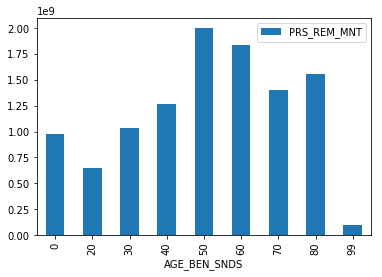

In [ ]:
age = pandas.concat(ages)
agg = age.groupby("AGE_BEN_SNDS").sum()
agg.plot(kind="bar")

Difficile d'interpréter ce graphique sans le comparer à la pyramide des âges mais ce n'est pas l'objectif ici. Chaque statistique prend un peu de temps. Et si nous tirions un échantillon aléatoire à 1%.

## Echantillon

In [ ]:
ech = []
for i, df in enumerate(pandas.read_csv(filename, 
                    sep=";", iterator=True, chunksize=10000)):
    sub = df.sample(frac=0.01)
    ech.append(sub)
    if len(ech) % 100 == 0:
        print(datetime.now(), len(ech), "lignes", 10000 * len(ech))

2017-05-30 10:44:25.928563 100 lignes 1000000
2017-05-30 10:44:32.106814 200 lignes 2000000
2017-05-30 10:44:38.184663 300 lignes 3000000
2017-05-30 10:44:44.227933 400 lignes 4000000
2017-05-30 10:44:50.512094 500 lignes 5000000
2017-05-30 10:44:56.719439 600 lignes 6000000
2017-05-30 10:45:02.765321 700 lignes 7000000
2017-05-30 10:45:08.925487 800 lignes 8000000
2017-05-30 10:45:14.985660 900 lignes 9000000
2017-05-30 10:45:20.955588 1000 lignes 10000000
2017-05-30 10:45:26.937962 1100 lignes 11000000
2017-05-30 10:45:32.843036 1200 lignes 12000000
2017-05-30 10:45:38.760077 1300 lignes 13000000
2017-05-30 10:45:44.834152 1400 lignes 14000000
2017-05-30 10:45:50.874544 1500 lignes 15000000
2017-05-30 10:45:56.933721 1600 lignes 16000000
2017-05-30 10:46:02.952165 1700 lignes 17000000
2017-05-30 10:46:09.038052 1800 lignes 18000000
2017-05-30 10:46:15.088247 1900 lignes 19000000
2017-05-30 10:46:21.059986 2000 lignes 20000000
2017-05-30 10:46:27.112262 2100 lignes 21000000
2017-05-30

In [ ]:
echantillon = pandas.concat(ech)
echantillon.shape

(308698, 56)

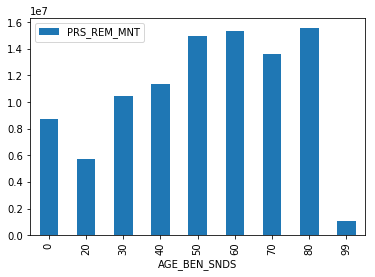

In [ ]:
echantillon[["AGE_BEN_SNDS", "PRS_REM_MNT"]] \
        .groupby("AGE_BEN_SNDS").sum().plot(kind="bar")

## pickle

Le module [pickle](https://docs.python.org/3/library/pickle.html) permet de [sérialiser](https://fr.wikipedia.org/wiki/S%C3%A9rialisation). Cette opération transforme le contenu d'un objet tel qu'il est en mémoire en une séquence d'octets qu'on peut alors enregistrer sur disque. Comme ce format de fichier est plus proche de la mémoire, il se charge beaucoup plus vite. Cela permet de gagner un peu de temps. L'inconvénient est que ce format n'est pas toujours compatible d'une version de python ou pandas à l'autre.

In [ ]:
echantillon.to_csv("echantillon.csv", sep=";", index=False)

In [ ]:
import os
os.stat("echantillon.csv").st_size / 2**20

52.02505111694336

In [ ]:
begin = time.clock()
ech2 = pandas.read_csv("echantillon.csv", sep=";")
print(time.clock()-begin)

1.936016172253403


In [ ]:
ech2.shape

(308698, 56)

In [ ]:
echantillon.to_pickle("echantillon.pickle")

In [ ]:
begin = time.clock()
ech3 = pandas.read_pickle("echantillon.pickle")
print(time.clock()-begin)

0.15137507214785728


### SQLite3

Un échantillon fait disparaître les classes les moins représentées. On peut accélérer le traitement en passant par [Sqlite](https://www.sqlite.org/) et disponible via le module [sqlite](https://docs.python.org/3.6/library/sqlite.html). Première étape : créer la base.

In [ ]:
import sqlite3
cnx = sqlite3.connect('damir2.db3')

In [ ]:
for i, df in enumerate(pandas.read_csv(filename, 
            sep=";", iterator=True, chunksize=100000)):
    df.to_sql(con=cnx, name="damir", if_exists="replace" if i == 0 else "append")
    if (i+1) % 10 == 0:
        print(datetime.now(), (i+1) * 100000, "lignes")
print("done")

c:\Python36_x64\lib\site-packages\pandas\core\generic.py:1345: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


2017-05-30 11:01:03.555622 1000000 lignes
2017-05-30 11:01:21.386774 2000000 lignes
2017-05-30 11:01:38.884705 3000000 lignes
2017-05-30 11:01:56.597609 4000000 lignes
2017-05-30 11:02:15.342849 5000000 lignes
2017-05-30 11:02:34.139513 6000000 lignes
2017-05-30 11:02:52.109376 7000000 lignes
2017-05-30 11:03:10.943733 8000000 lignes
2017-05-30 11:03:30.108161 9000000 lignes
2017-05-30 11:03:48.430845 10000000 lignes
2017-05-30 11:04:08.285997 11000000 lignes
2017-05-30 11:04:28.463287 12000000 lignes
2017-05-30 11:04:48.847285 13000000 lignes
2017-05-30 11:05:10.296696 14000000 lignes
2017-05-30 11:05:30.536988 15000000 lignes
2017-05-30 11:05:49.556297 16000000 lignes
2017-05-30 11:06:08.340223 17000000 lignes
2017-05-30 11:06:27.330911 18000000 lignes
2017-05-30 11:06:45.629662 19000000 lignes
2017-05-30 11:07:03.844140 20000000 lignes
2017-05-30 11:07:24.329185 21000000 lignes
2017-05-30 11:07:43.706297 22000000 lignes
2017-05-30 11:08:01.890057 23000000 lignes
2017-05-30 11:08:20.

C'est un peu long mais le calcul de statistique est plus rapide par la suite.

In [ ]:
import time
begin = time.clock()
dfage = pandas.read_sql(
    'select AGE_BEN_SNDS, count(*) from damir group by AGE_BEN_SNDS', cnx)
print("time", time.clock() - begin)
dfage

time 36.468132530620096


,AGE_BEN_SNDS,count(*)
0,0,3242398
1,20,3359541
2,30,3379306
3,40,3730061
4,50,4454444
5,60,4885615
6,70,3956604
7,80,3817004
8,99,44828


On peut aussi programmer des [commandes magiques](http://www.xavierdupre.fr/app/pyensae/helpsphinx/notebooks/pyensae_sql_magic.html) pour alléger la syntaxe.

In [ ]:
%load_ext pyensae

The pyensae extension is already loaded. To reload it, use:
  %reload_ext pyensae


In [ ]:
%SQL_connect damir.db3

In [ ]:
%SQL_tables

['damir']

In [ ]:
%%SQL
SELECT * FROM damir LIMIT 5

,index,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,...,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
0,0,201512,52,0,52,0,3,1,121,9999,...,2,0,1,52,0,1,18,1,1,None
1,1,201512,11,40,27,0,1,1,121,9999,...,2,0,9,27,0,1,4,9,1,None
2,2,201512,53,60,53,1,1,2,121,9999,...,2,0,1,53,0,1,42,1,0,None
3,3,201512,32,20,93,1,1,2,121,9999,...,7,0,1,32,0,1,1,1,1,None
4,4,201512,99,60,99,0,1,2,121,9999,...,2,0,1,99,0,0,9,2,1,None


In [ ]:
%lsmagic

Available line magics:
%HIVE_azure_submit  %SQL  %SQL_add_function  %SQL_close  %SQL_connect  %SQL_drop_table  %SQL_import_df  %SQL_import_tsv  %SQL_refresh_completion  %SQL_schema  %SQL_tables  %alias  %alias_magic  %autocall  %automagic  %autosave  %azureclient  %blob_close  %blob_containers  %blob_copy  %blob_delete  %blob_down  %blob_downmerge  %blob_head  %blob_ls  %blob_lsl  %blob_open  %blob_path  %blob_rm  %blob_rmr  %blob_up  %blobcontainer  %blobservice  %bookmark  %cd  %clear  %close_remote_shell  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dfs_ls  %dfs_mkdir  %dfs_rm  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %encoding  %env  %grep  %gui  %hd_job_kill  %hd_job_status  %hd_open  %hd_pig_submit  %hd_queue  %hd_tail_stderr  %hd_wasb_prefix  %head  %hhelp  %hist  %history  %hive_submit  %job_syntax  %jsdf  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lsr  %lsrepo  %macro  %magi

### dask

[dask](http://dask.pydata.org/en/latest/) fonctionne un peu comme pandas excepté que l'exécution des requêtes est différée. On utilise [read_csv](http://dask.pydata.org/en/latest/dataframe-api.html#dask.dataframe.read_csv).

In [ ]:
import dask.dataframe
dfdk = dask.dataframe.read_csv(filename, sep=";")
dfdk.head(n=2)

,FLX_ANN_MOI,ORG_CLE_REG,AGE_BEN_SNDS,BEN_RES_REG,BEN_CMU_TOP,BEN_QLT_COD,BEN_SEX_COD,DDP_SPE_COD,ETE_CAT_SNDS,ETE_REG_COD,...,PSE_ACT_CAT,PSE_SPE_SNDS,PSE_STJ_SNDS,PRE_INS_REG,PSP_ACT_SNDS,PSP_ACT_CAT,PSP_SPE_SNDS,PSP_STJ_SNDS,TOP_PS5_TRG,Unnamed: 55
0,201512,52,0,52,0,3,1,121,9999,99,...,2,0,1,52,0,1,18,1,1,NaN
1,201512,11,40,27,0,1,1,121,9999,99,...,2,0,9,27,0,1,4,9,1,NaN


Les trois lignes qui suivent sont très rapides.

In [ ]:
import dask
dask.__version__

'0.14.3'

In [ ]:
dfdk2 = dfdk[["AGE_BEN_SNDS", "PRS_REM_MNT"]]
grdk = dfdk2.groupby("AGE_BEN_SNDS").sum()

La suivante, beaucoup moins.

In [ ]:
begin = time.clock()
res = grdk.compute()
print(time.clock() - begin)

95.24286231816768


In [ ]:
ech4 = dfdk.sample(frac=0.01)

In [ ]:
dfech = ech4.compute()

In [ ]:
type(dfech)

pandas.core.frame.DataFrame

In [ ]:
res

,PRS_REM_MNT
AGE_BEN_SNDS,
0,9.765261e+08
20,6.514744e+08
30,1.032308e+09
40,1.270637e+09
50,2.000145e+09
60,1.836182e+09
70,1.400264e+09
80,1.558689e+09
99,9.384509e+07


In [ ]:
dfdk.

C'est plus qu'avec SQLite3 mais dans cet exemple, dask relit le fichier à chaque calcul car il ne stocke pas un dataframe dans un format intermédiaire plus efficace tel que [parquet](http://parquet.apache.org/). dask propose des idées pour optimiser les calculs [Dask DataFrame Performance Tips](http://dask.pydata.org/en/latest/dataframe-performance.html).

### bcolz

[bcolz](https://github.com/Blosc/bcolz) organise différemment les données : par colonnes au lieu des lignes. Cela nécessite le plus souvant un stockage intermédiaire sur disque : [to_bcolz](https://github.com/dask/dask/pull/1386/files). Une fois transformées, les données livrent plus vite des statistiques sur une colonne.

## Grandes matrices

Les dataframes acceptent un type différent pour chaque colonne. Si toutes les colonnes sont numériques et de même types, on peut s'orienter vers d'autres solutions.

### Zarr

[zarr](http://zarr.readthedocs.io/en/latest/) permet de manipuler des matrices qui ne tiennent pas en mémoire de la même façon que [numpy](http://www.numpy.org/). Les données sont compressés et parfois stockées sur disque. Ce module masque beaucoup de détails en proposant une interface connue.

In [ ]:
import zarr
z = zarr.zeros((10000, 10000), chunks=(1000, 1000), dtype='i4')
z

Array((10000, 10000), int32, chunks=(1000, 1000), order=C)
  nbytes: 381.5M; nbytes_stored: 275; ratio: 1454545.5; initialized: 0/100
  compressor: Zlib(level=1)
  store: dict

In [ ]:
z[4,5]

0

Voir aussi [wendelin.core](https://pypi.python.org/pypi/wendelin.core), [hdf5](http://www.h5py.org/).

## Formats compressés

* [sparse dataframes](https://pandas.pydata.org/pandas-docs/stable/sparse.html#)
* [scipy](https://docs.scipy.org/doc/scipy-0.18.1/reference/sparse.html)